In [1]:
%load_ext autoreload
%autoreload 2

from curl_utils import *

In [2]:
xn = 128
yn = 128

x = np.linspace(0,1,xn).tolist()
y = np.linspace(0,1,yn).tolist()
x,y = np.meshgrid(x,y)
dx = x[0,1]-x[0,0]
dy = y[1,0]-y[0,0]

xe = np.linspace(0-dx,1+dx,xn+2).tolist()
ye = np.linspace(0-dy,1+dy,yn+2).tolist()
xe,ye = np.meshgrid(xe,ye)
dxe = xe[0,1]-xe[0,0]
dye = ye[1,0]-ye[0,0]

x = x.reshape(1,1,xn,yn)
y = y.reshape(1,1,xn,yn)
xe = xe.reshape(1,1,xn+2,yn+2)
ye = ye.reshape(1,1,xn+2,yn+2)

eta1 = 1 + 100*xe*ye
eta2 = 1000 - 999/(1 + np.exp(-100*(xe - 0.5)))
eta3 = 1000 - 999/(1 + np.exp(-100*(ye - 0.5)))
eta4 = 1 + 10*xe*ye
eta5 = 0.5*eta1 + 0.5*eta2
eta6 = 0.5*eta2 + 0.5*eta3
eta7 = 0.5*eta3 + 0.5*eta1
eta8 = 1000 - 999/(1 + np.exp(-100*(xe*ye - 0.5)))

eta = None

for e in [eta1, eta2, eta3, eta4, eta5, eta6, eta7, eta8]:
    de_dy = ((e[:,:,2:,:] - e[:,:,:-2,:])/(2*dy))[:,:,:,1:-1]
    e = e[:,:,1:-1,1:-1]
    
    if eta is None:
        eta = e
        deta_dy = de_dy
    else:
        eta = np.concatenate((eta, e), axis=0)
        deta_dy = np.concatenate((deta_dy, de_dy), axis=0)

x = np.repeat(x, eta.shape[0], axis=0)
y = np.repeat(y, eta.shape[0], axis=0)
u,v,p,T = get_trubitsyn(x, y, eta, deta_dy, Ra=10, T0=0.1)

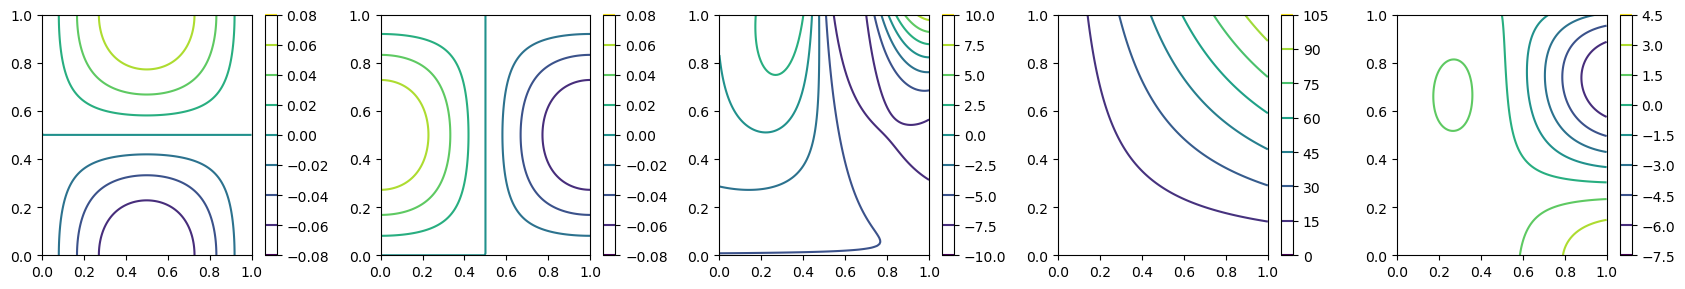

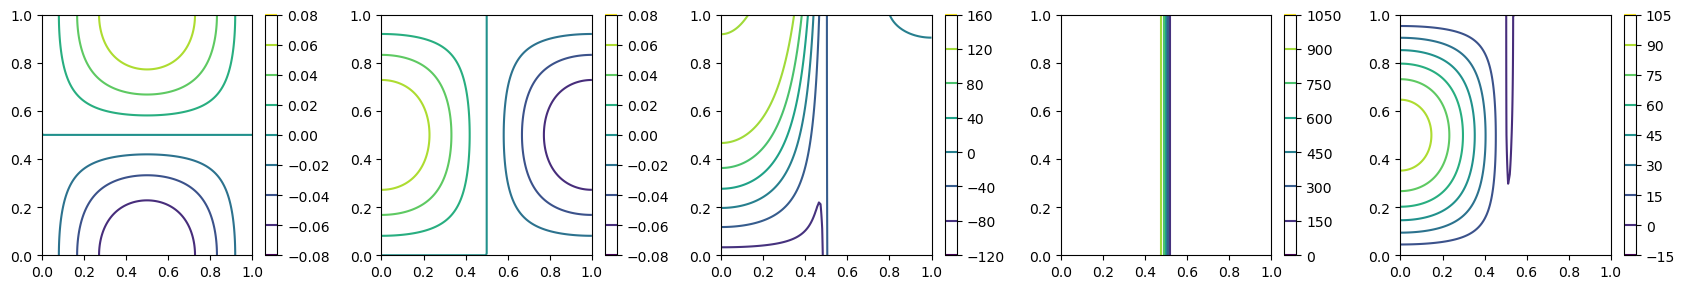

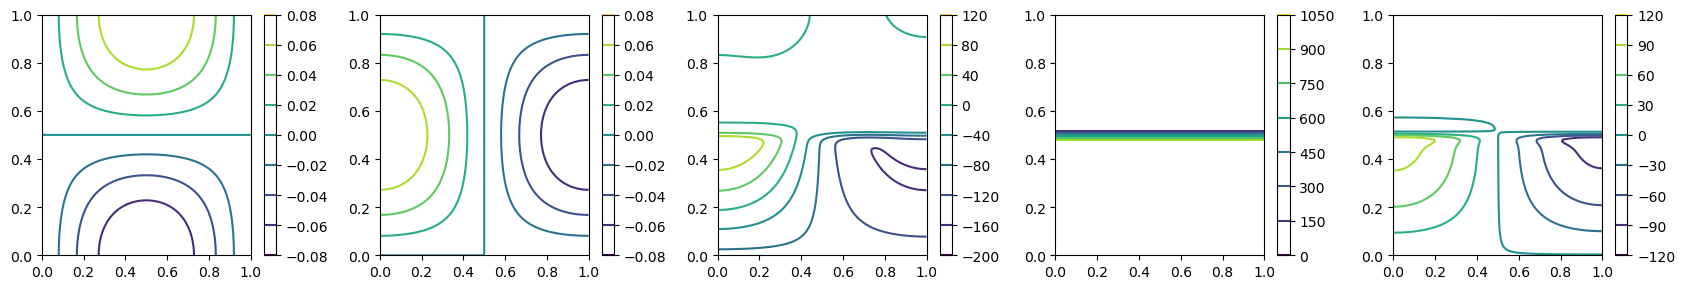

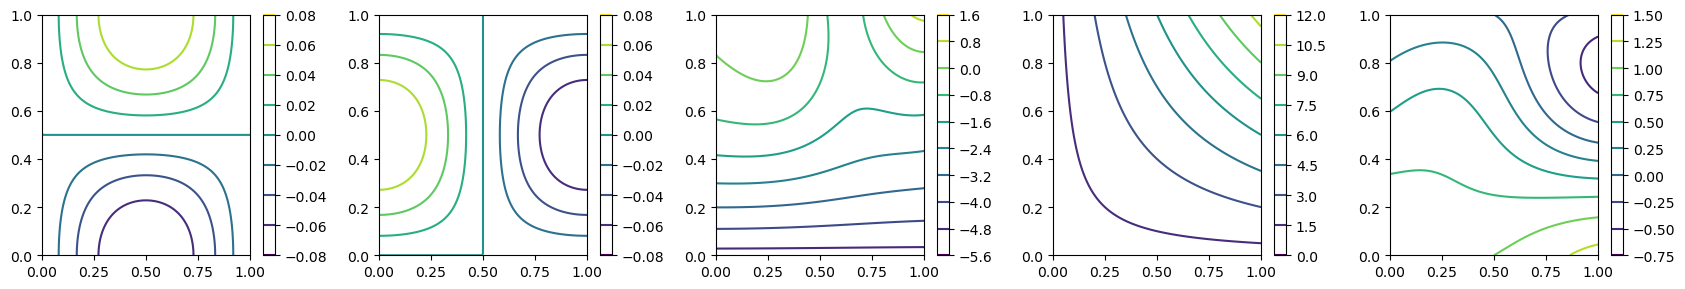

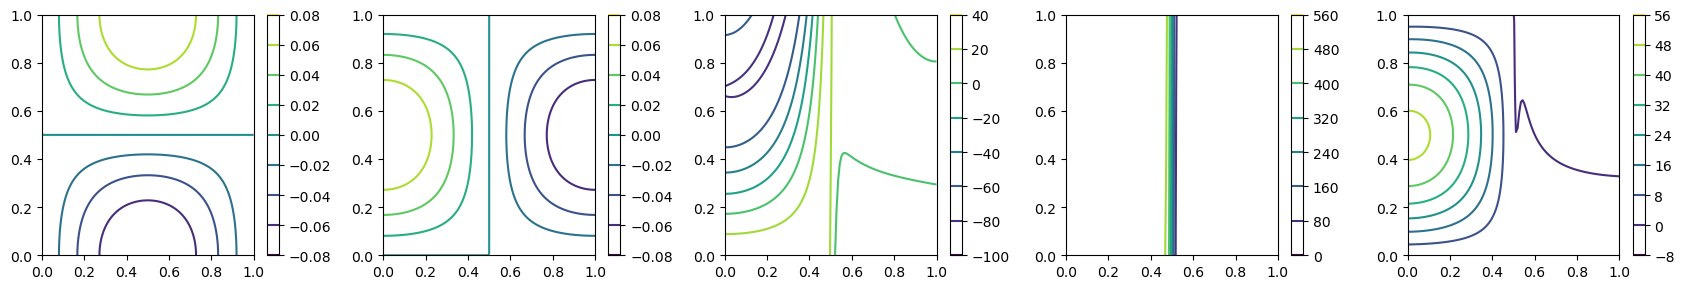

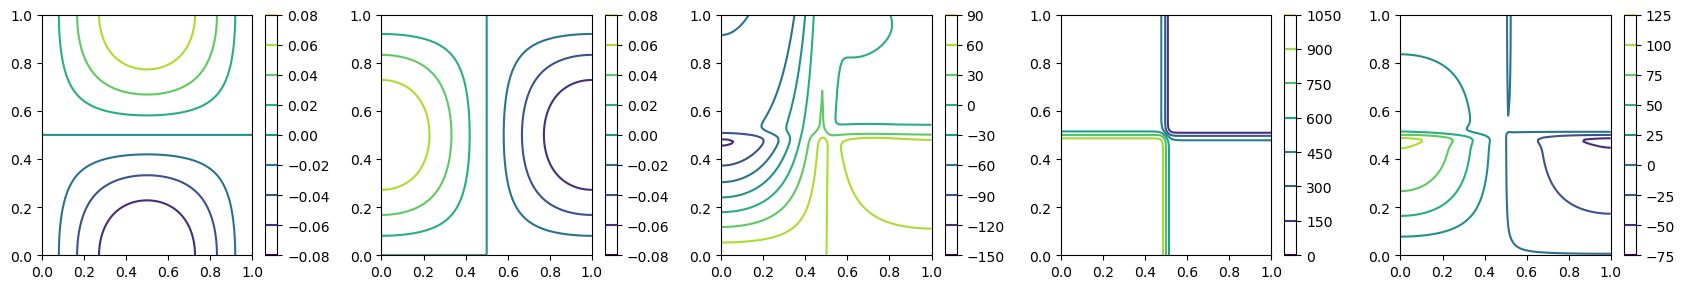

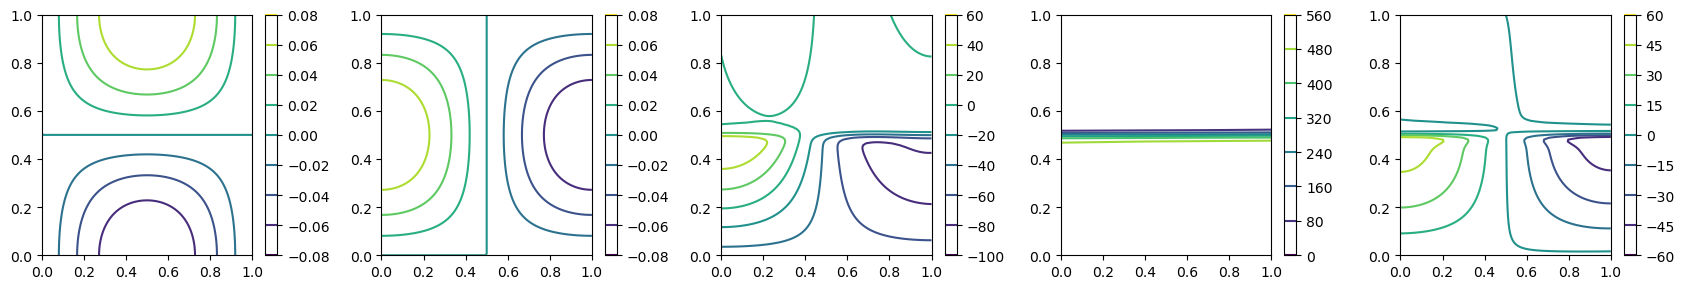

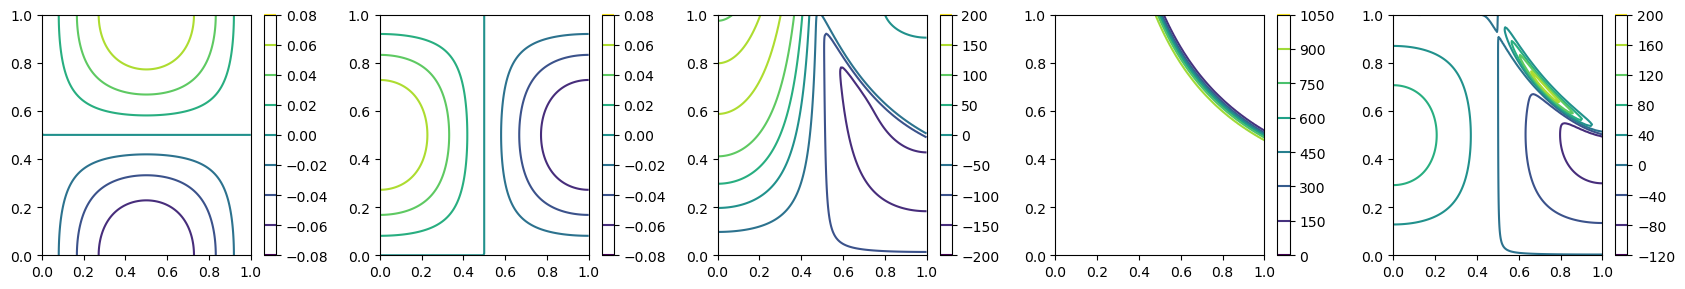

0 -0.079571384775604 0.079571384775604
1 -0.079571384775604 0.079571384775604
2 -161.54943163838828 159.15184021718974
3 1.0 1000.0
4 -109.64151288505201 181.42984903788977


In [3]:
var_min, var_max = [1e+16]*5, [-1e+16]*5
T_min, T_max = 1e+16, -1e+16

for i in range(8):
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(17, 3))
    for var_ind, var in enumerate([u[i,0,...],
                                   v[i,0,...],
                                   p[i,0,...],
                                   eta[i,0,...],
                                   T[i,0,...]]):
        cax = axs[var_ind].contour(x[0,0,...], y[0,0,...], var)
        fig.colorbar(cax)
        
        var_min[var_ind] = min(var_min[var_ind], var.min())
        var_max[var_ind] = max(var_max[var_ind], var.max())
        
    plt.tight_layout()
    plt.show()
    
for i in range(len(var_min)):
    print(i, var_min[i], var_max[i])

5 16 replicate 5 normal gelu 208673


/Users/siddhantagarwal/anaconda3/lib/python3.11/site-packages/torch/autograd/__init__.py:200: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1682343668887/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


0 0.09289461374282837 5.749625984208251e-07 0.005755958613008261 0.01 0.5741009712219238
1000 0.09333700371104163 0.0 0.005755958613008261 0.01 0.07964491844177246
2000 0.09311249371485851 0.0 0.005755958613008261 0.005 0.07969212532043457
3000 0.09303760717497869 0.0 0.005755958613008261 0.005 0.07990193367004395
4000 0.09300015454656092 0.0 0.005755958613008261 0.0025 0.07973289489746094
5000 0.09297767997389911 0.0 0.005755958613008261 0.0025 0.0796821117401123
6000 0.0929626956770786 0.0 0.005755958613008261 0.00125 0.08032608032226562
7000 0.0929519919964045 0.0 0.005755958613008261 0.00125 0.08006405830383301
8000 0.0929439639014507 0.0 0.005755958613008261 0.000625 0.09080123901367188
9000 0.0929377196293952 0.0 0.005755958613008261 0.000625 0.0785372257232666


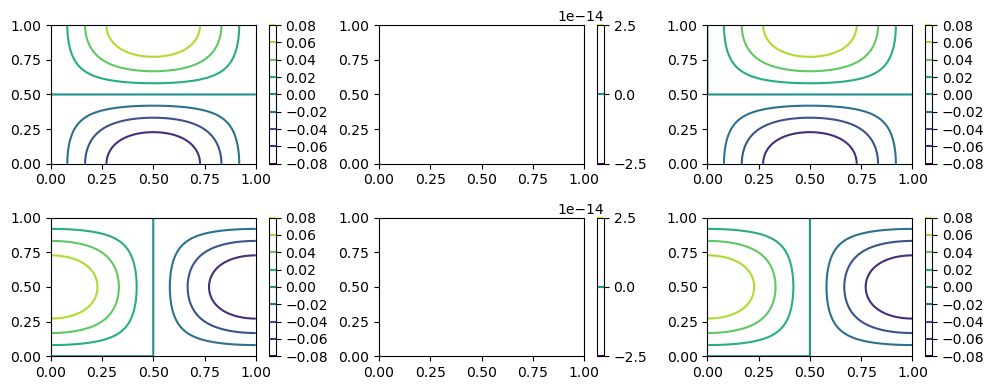

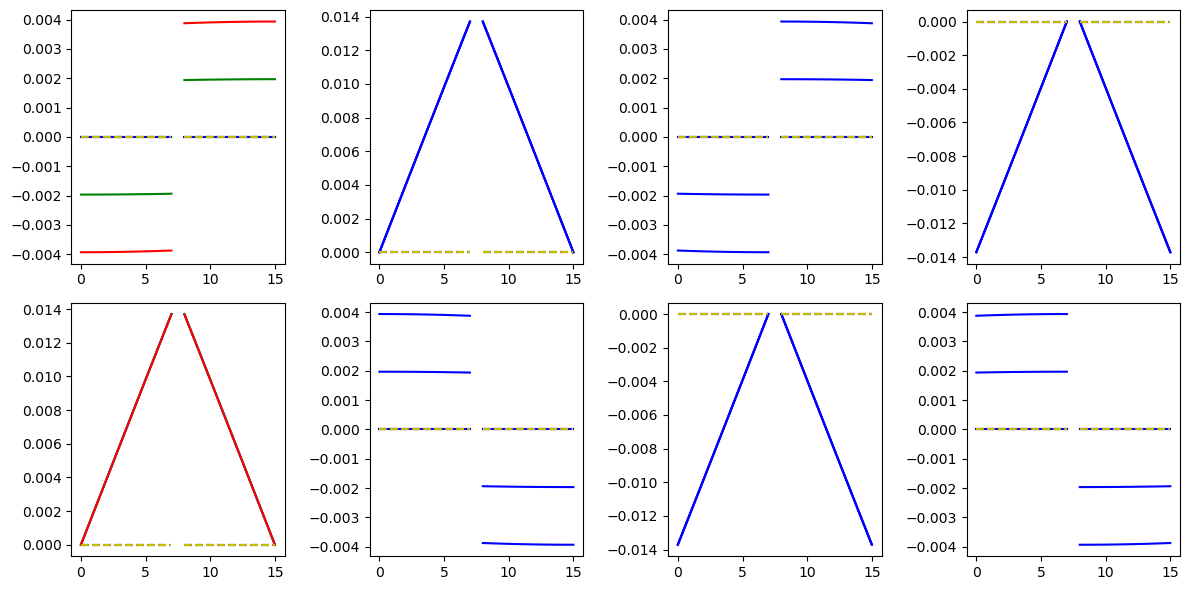

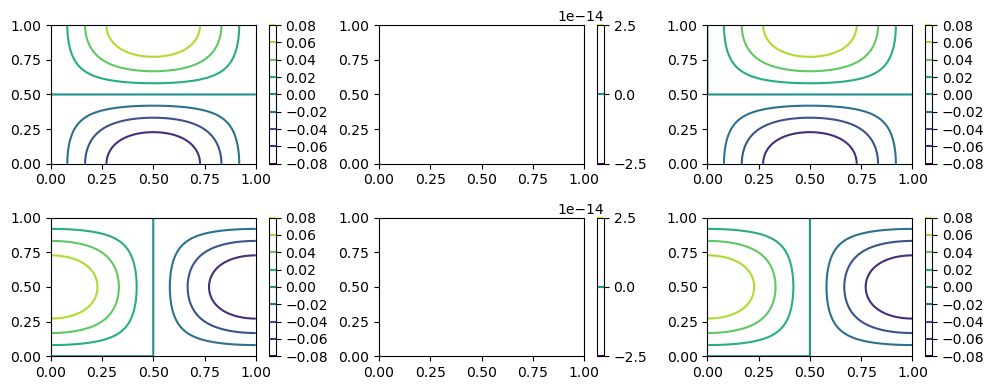

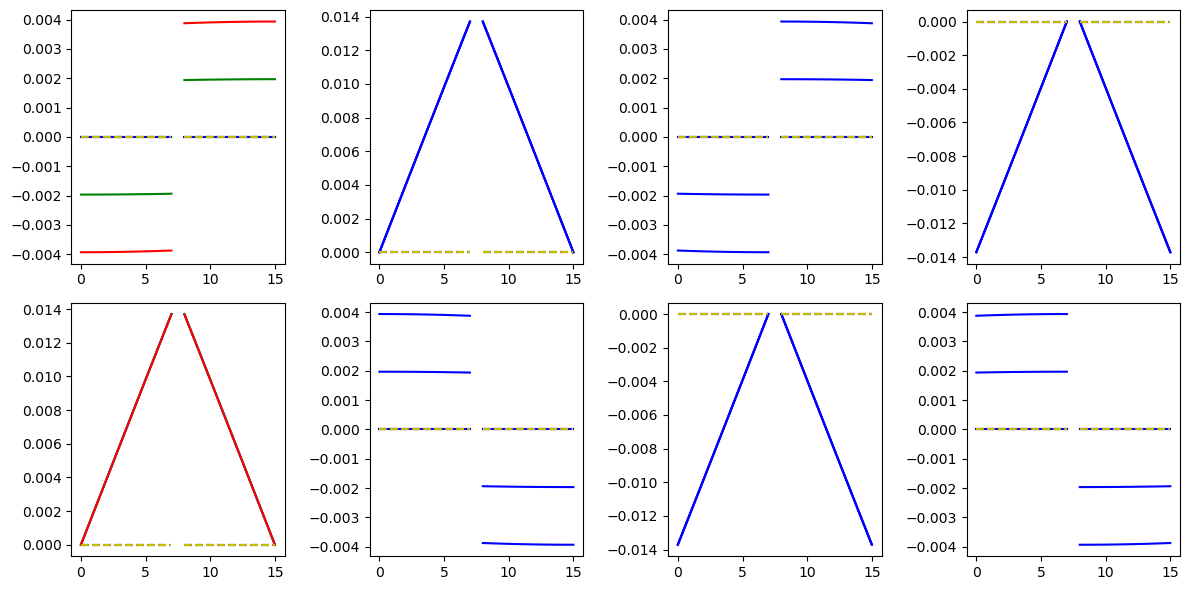

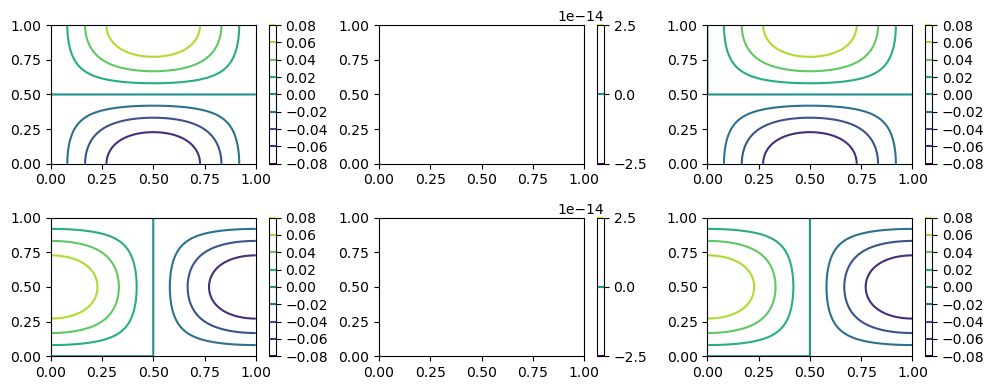

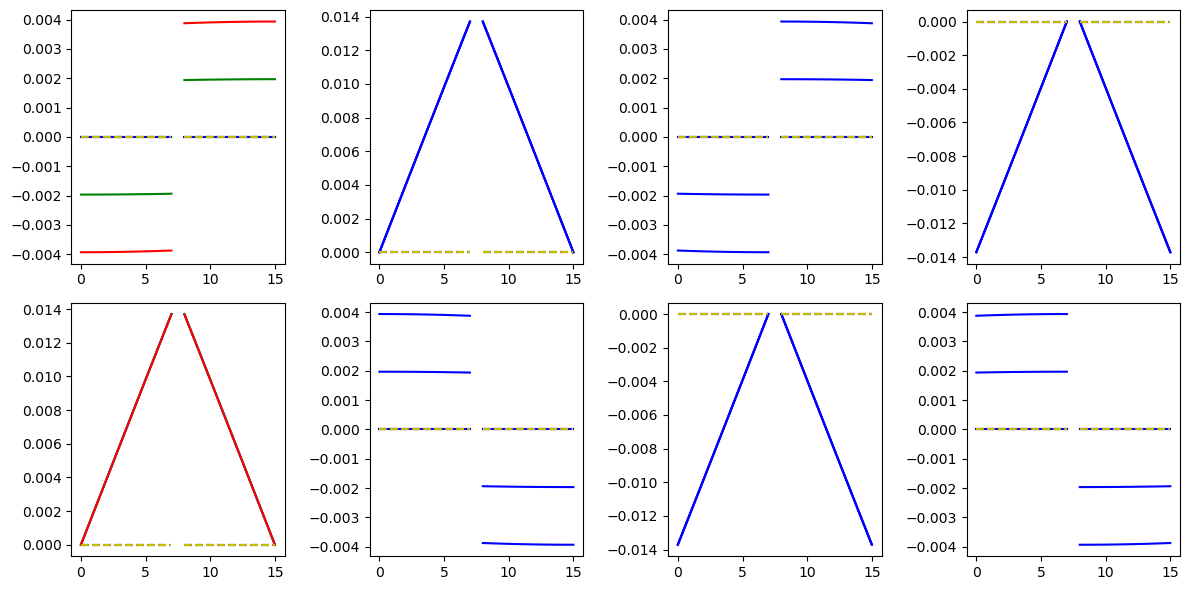

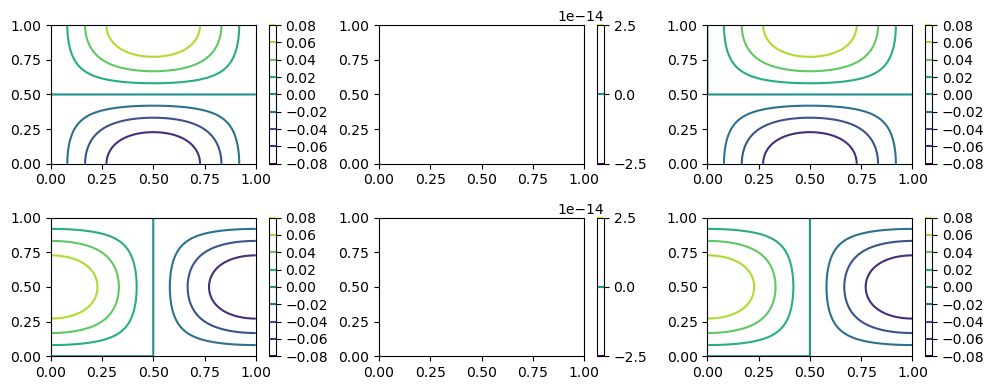

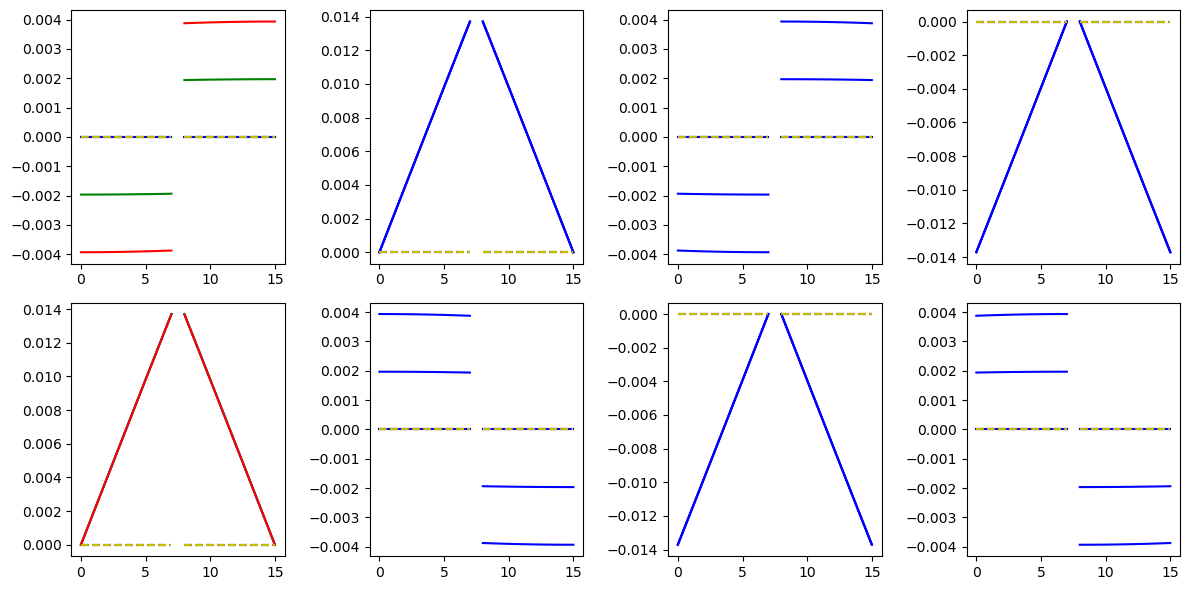

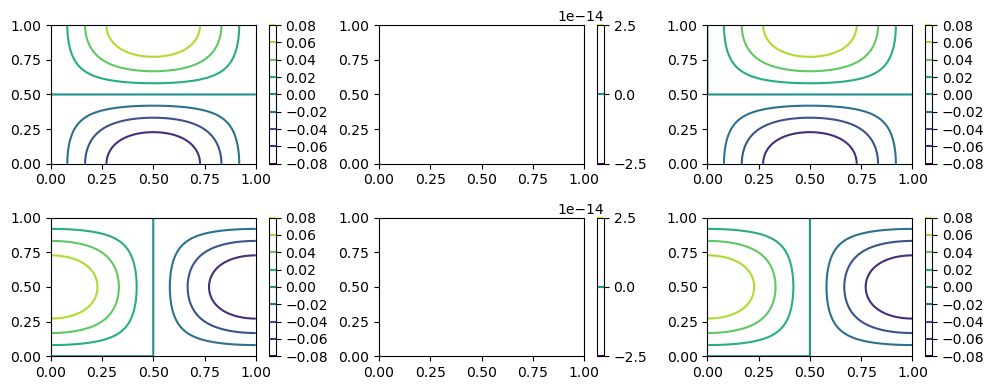

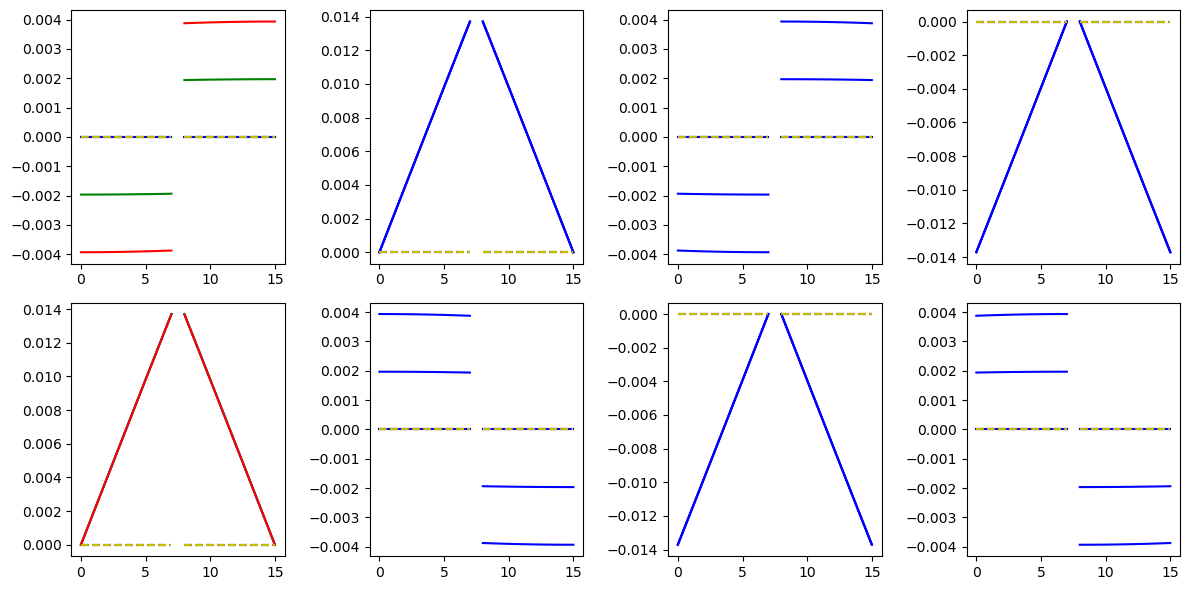

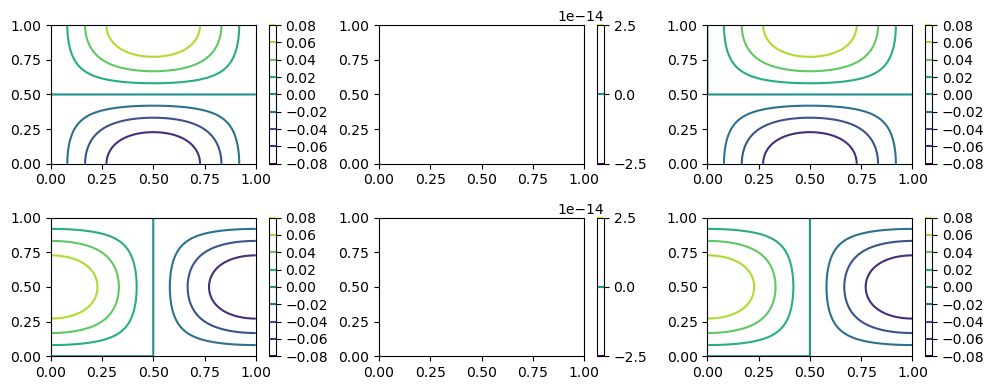

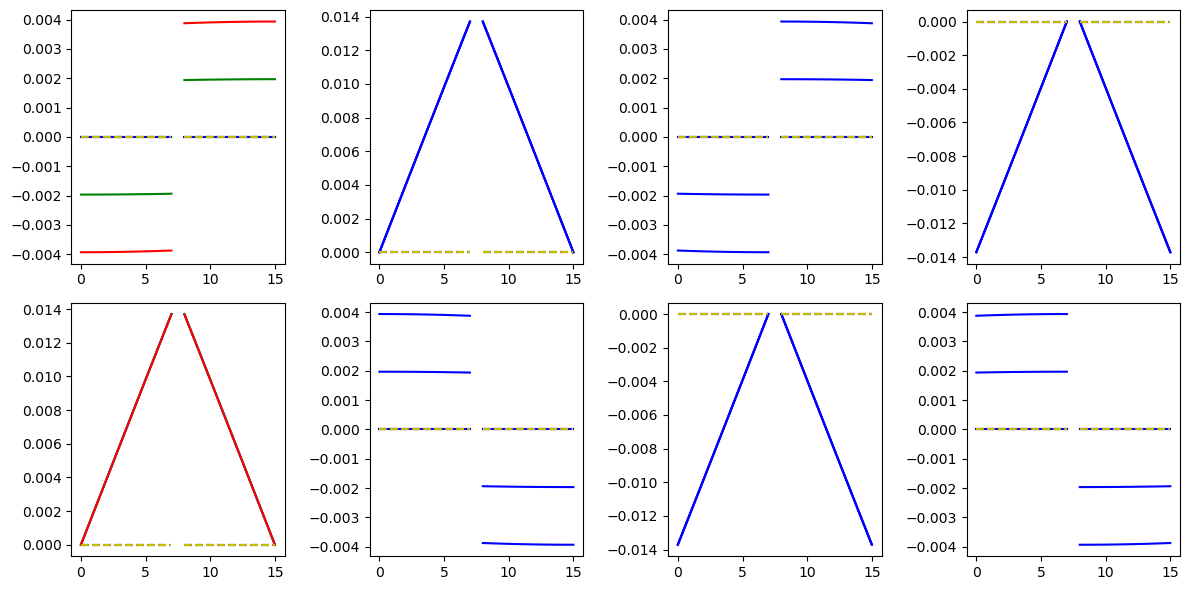

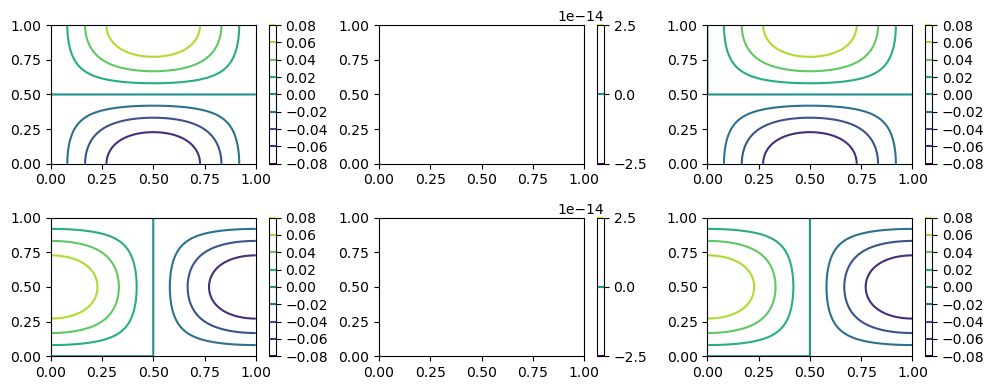

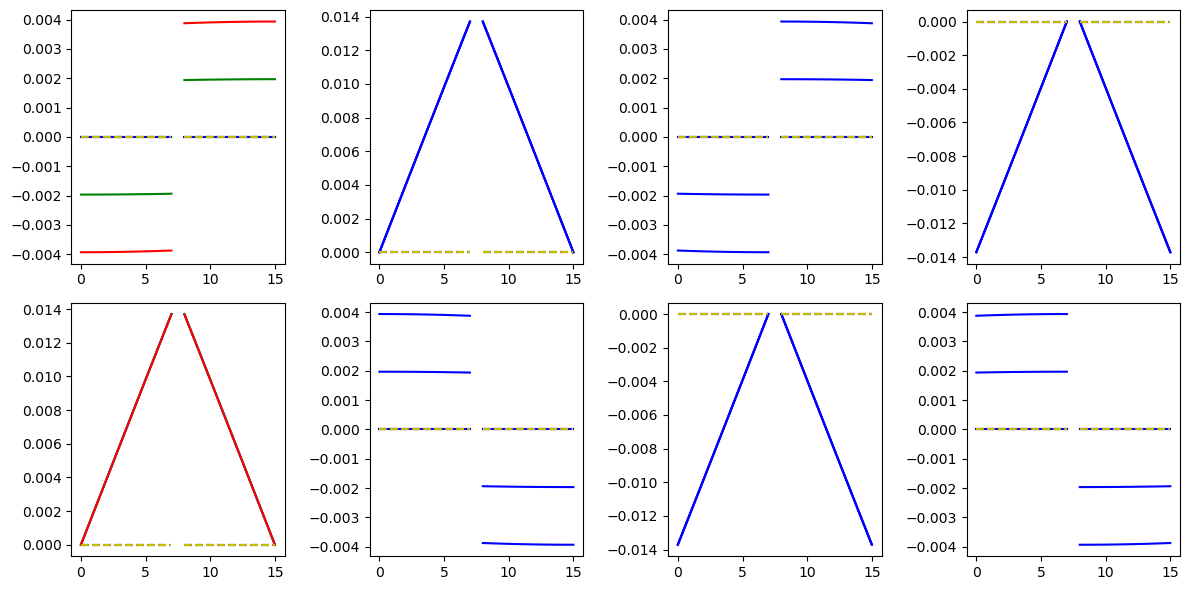

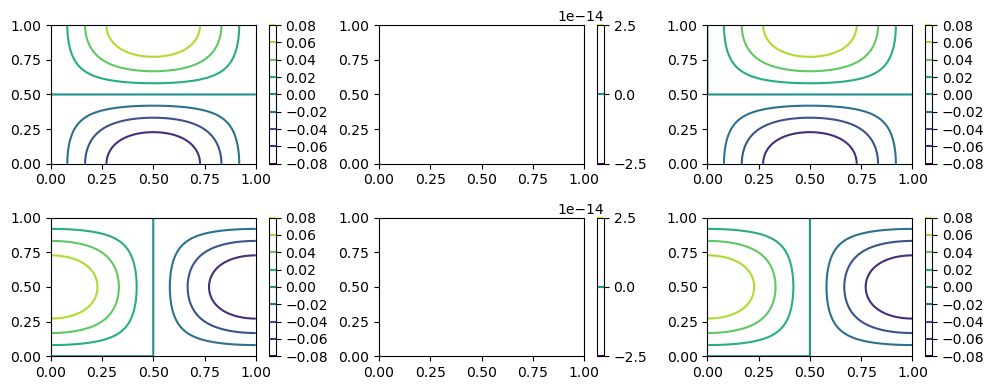

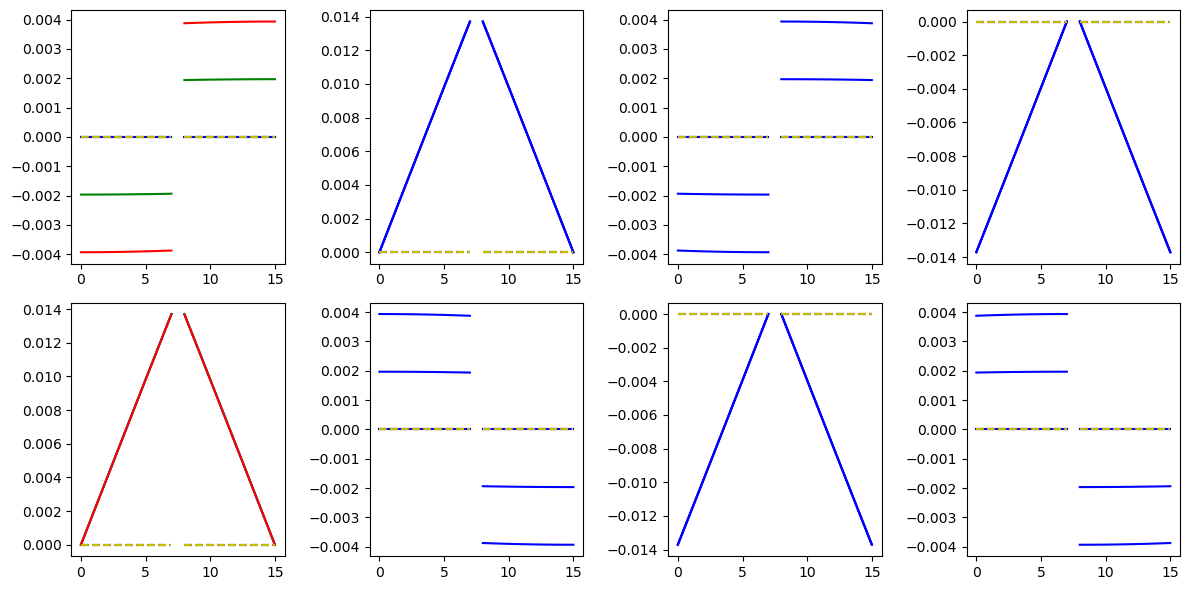


############################################
############################################
############################################
############################################

5 16 replicate 5 learned gelu 2106529
0 0.09634177386760712 4.282997906557284e-06 0.005755958613008261 0.01 0.7301480770111084
1000 0.21471195697010337 1.799133860913571e-05 0.005755958613008261 0.01 0.35349130630493164
2000 0.14375573796951313 2.3885910195531324e-05 0.005755958613008261 0.005 0.3548448085784912
3000 0.12007137163058396 2.4775199563009664e-05 0.005755958613008261 0.005 0.35468316078186035
4000 0.1082179883559684 2.5291354177170433e-05 0.005755958613008261 0.0025 0.36384105682373047
5000 0.10109670429235934 2.528512050048448e-05 0.005755958613008261 0.0025 0.38410210609436035
6000 0.09634888392650094 2.530537858547177e-05 0.005755958613008261 0.00125 0.3820960521697998
7000 0.09295625656570745 2.5318675398011692e-05 0.005755958613008261 0.00125 0.3805348873138428
8000 0.09041167910475832 2.5

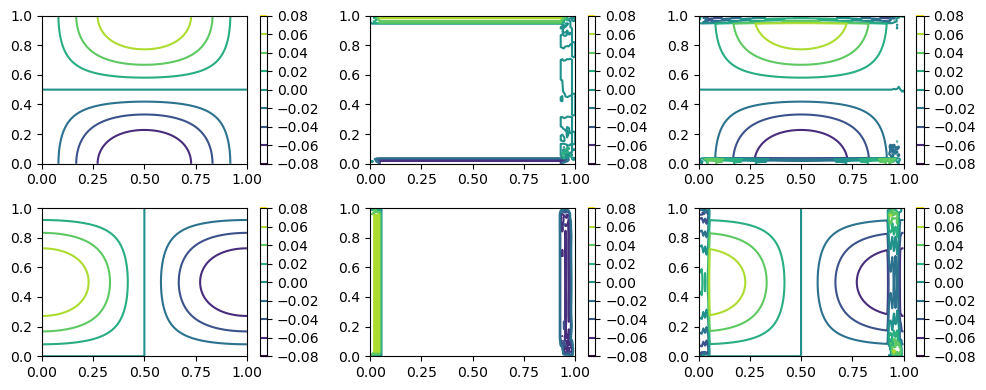

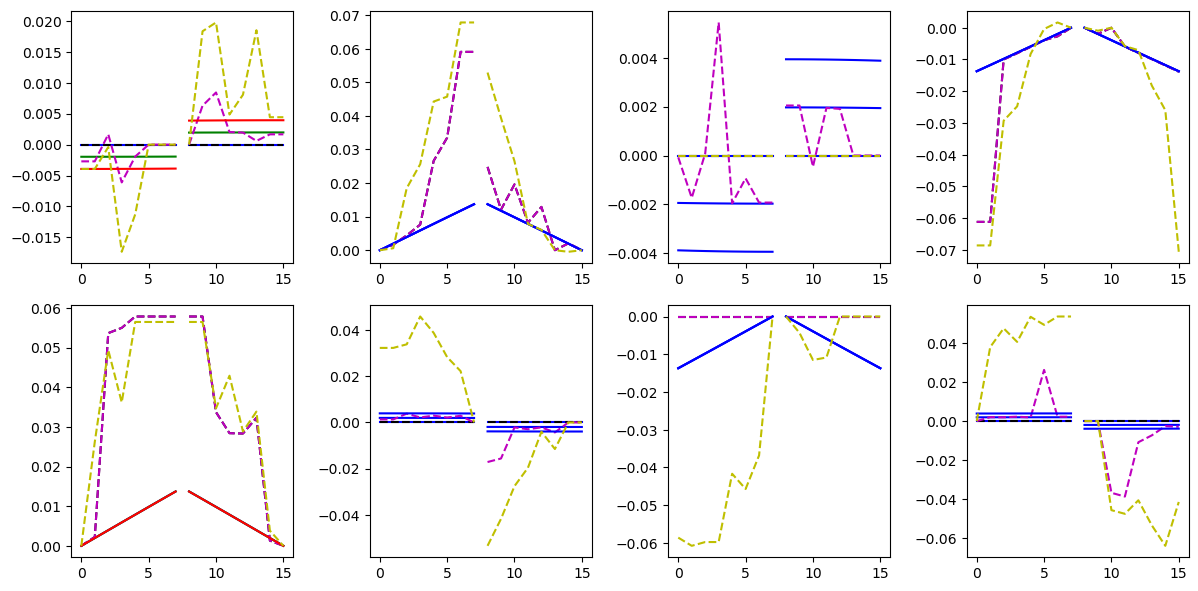

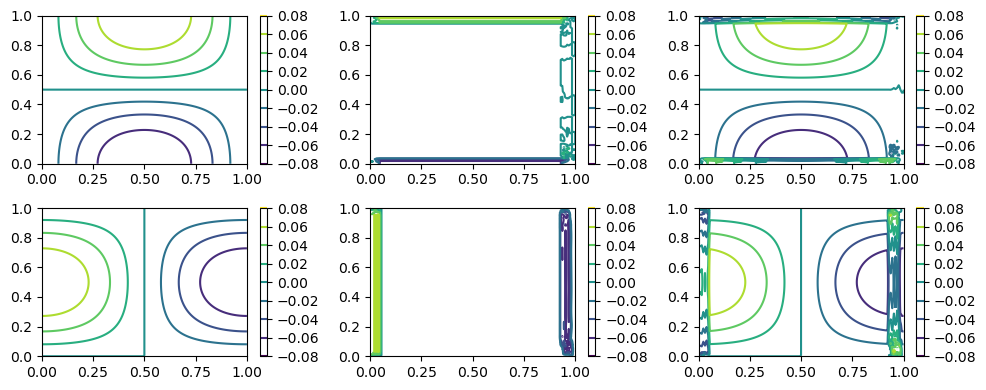

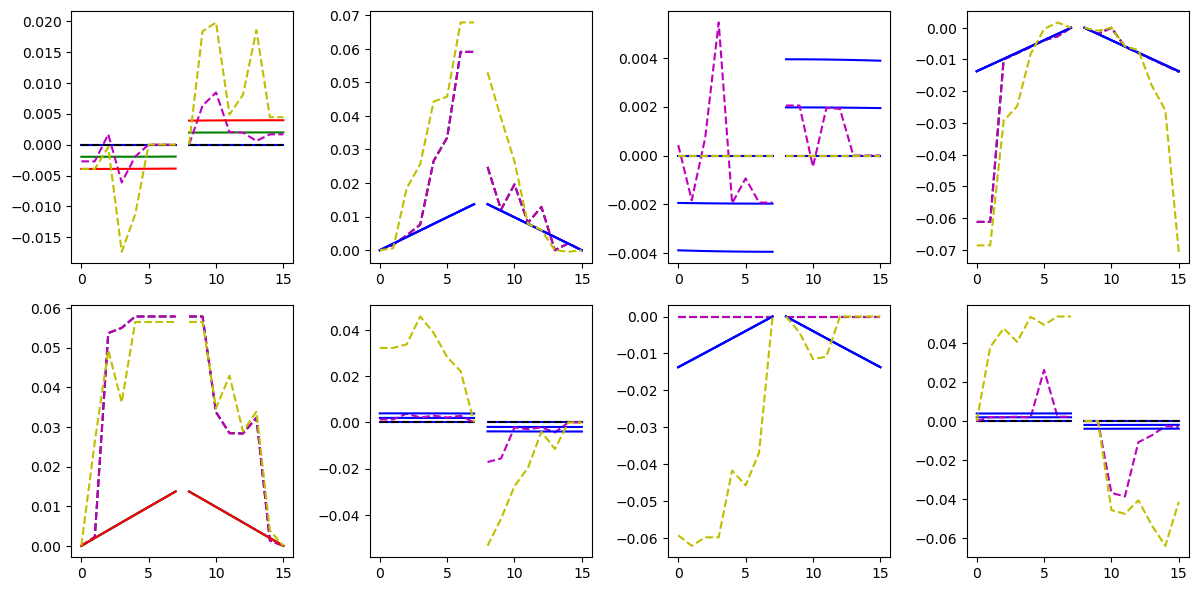

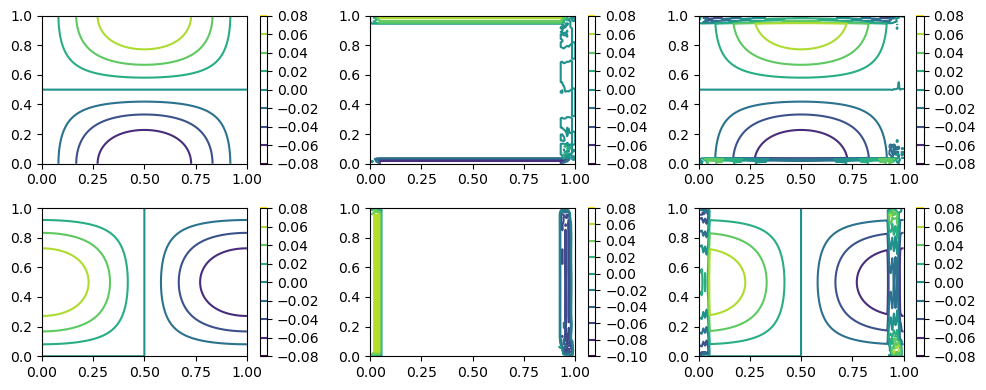

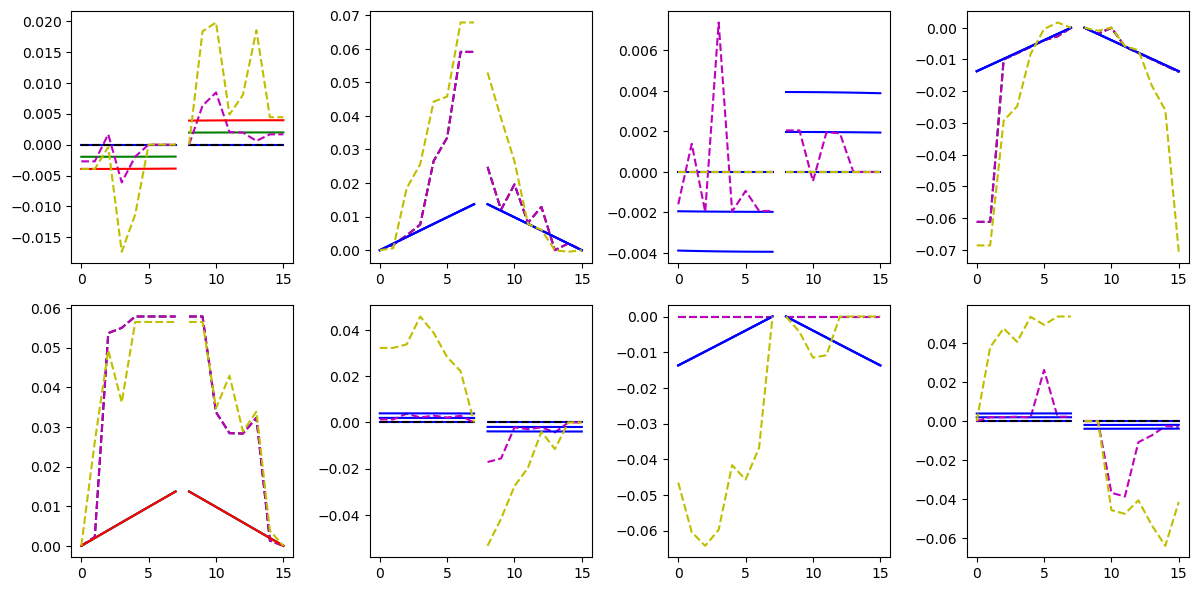

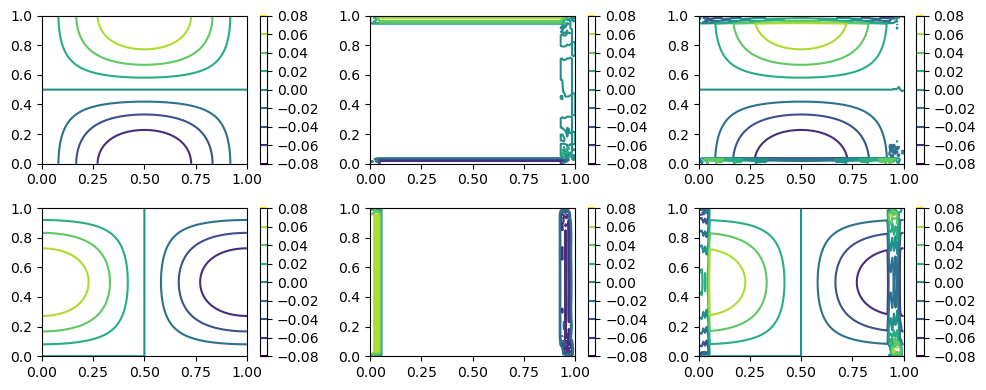

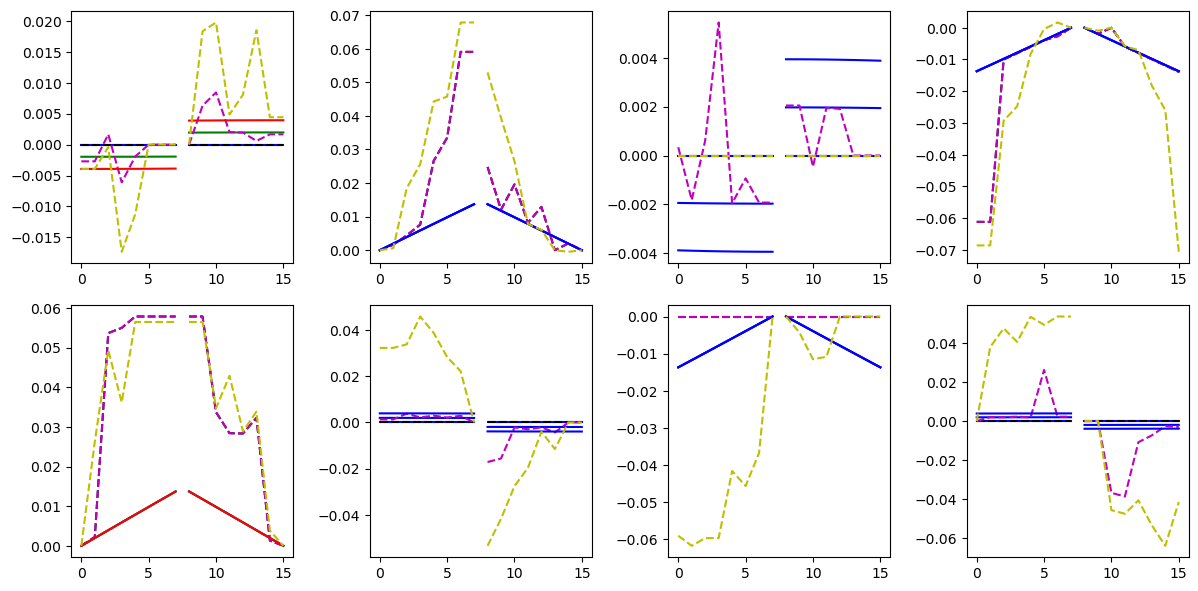

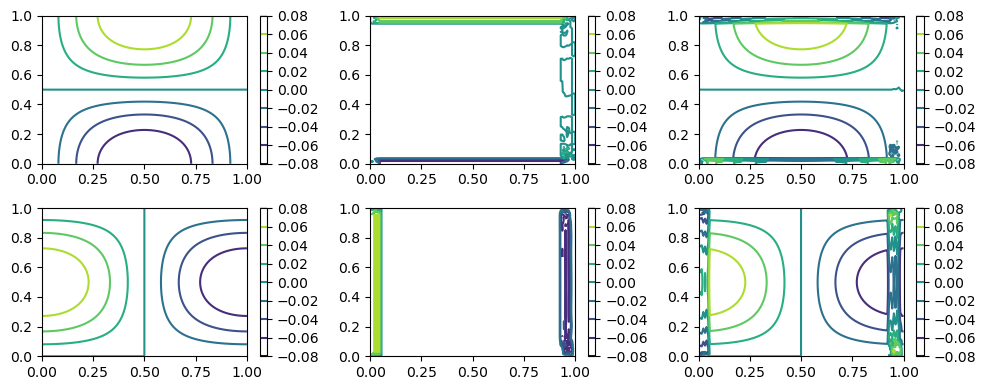

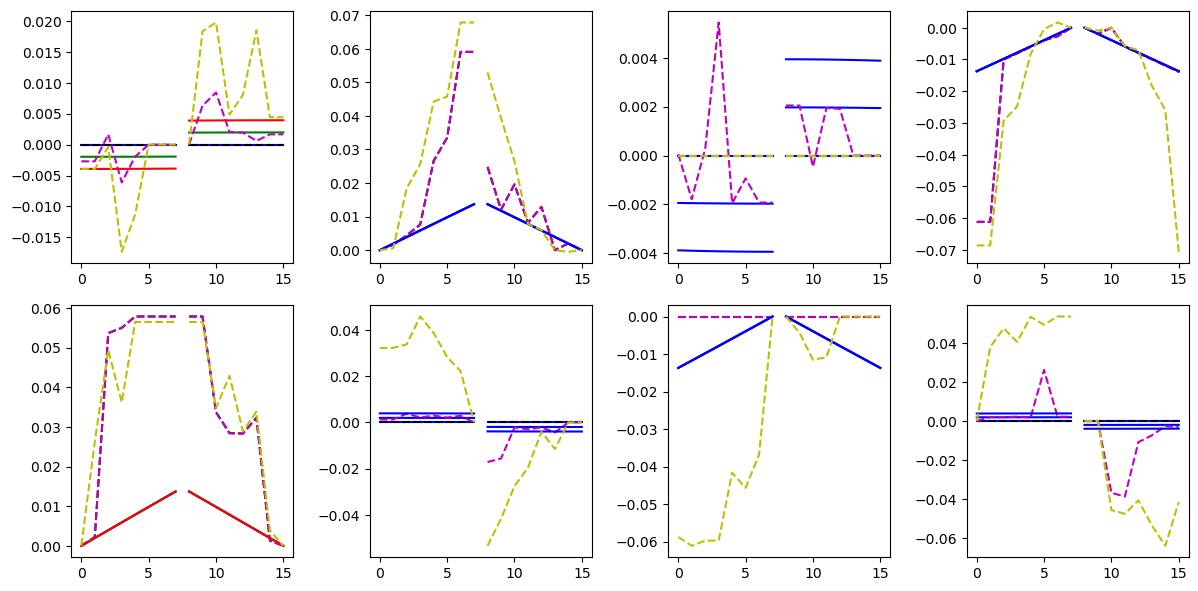

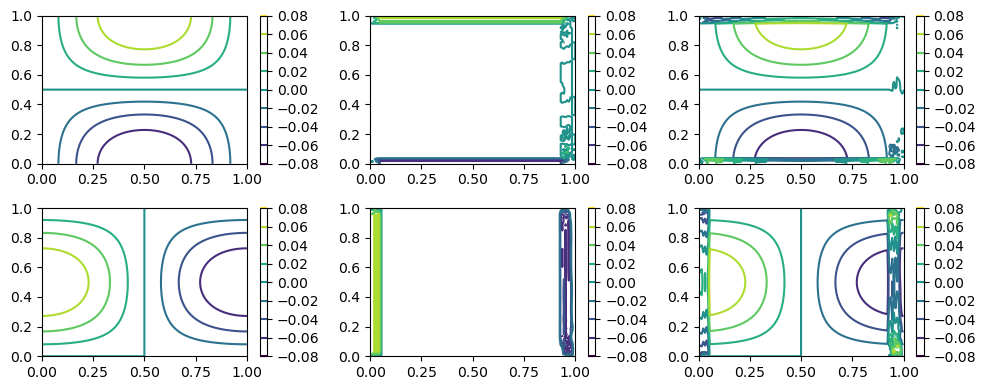

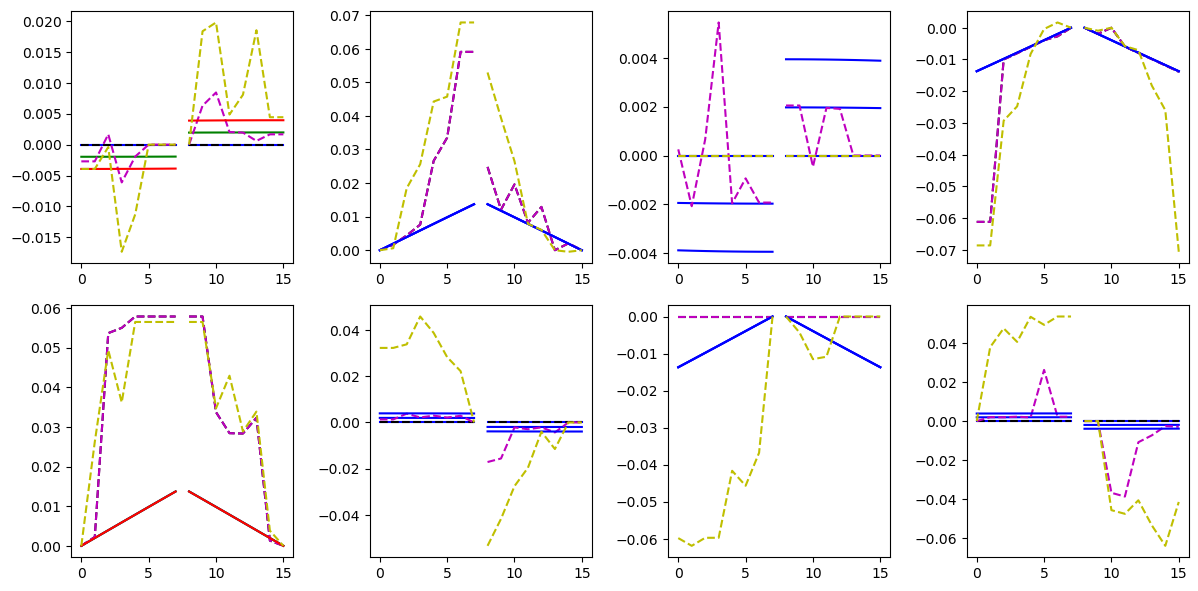

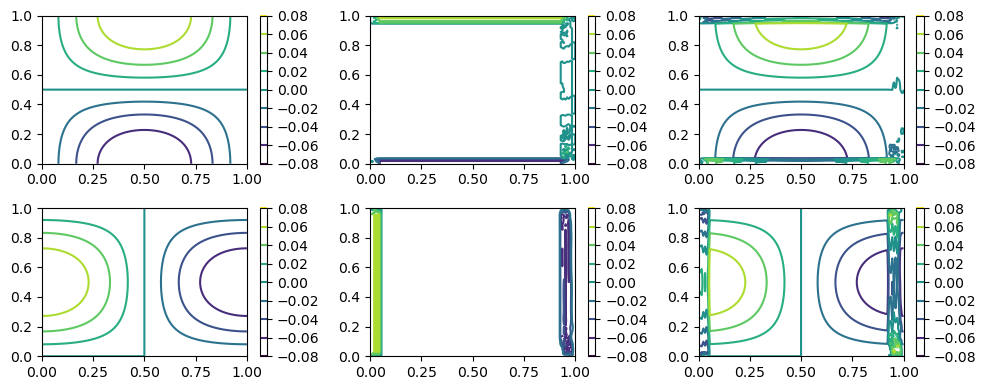

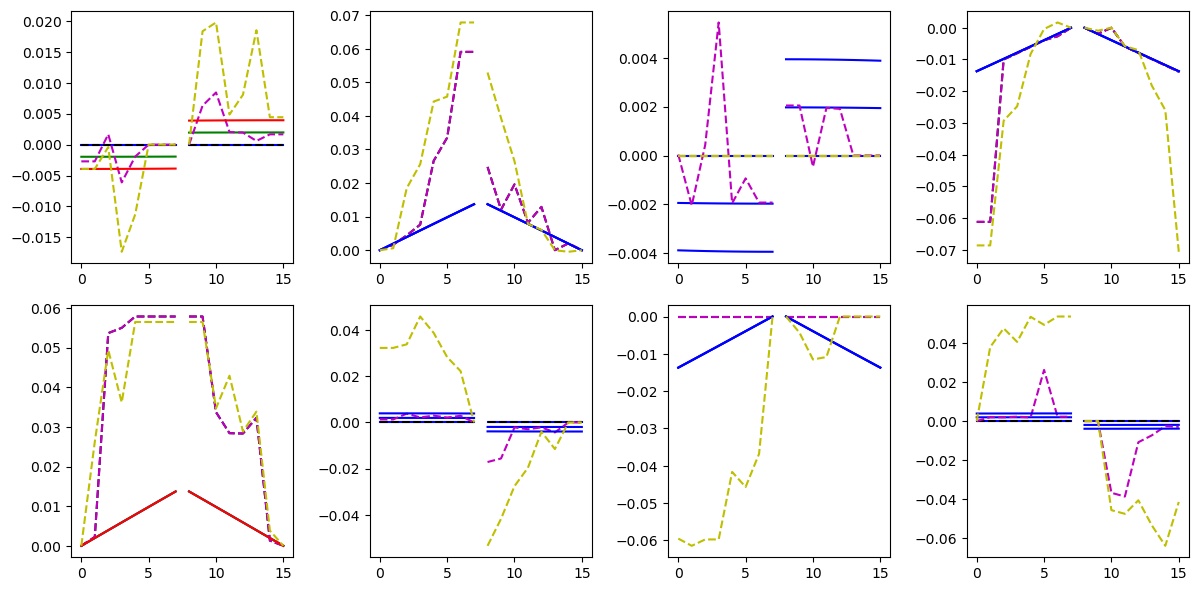

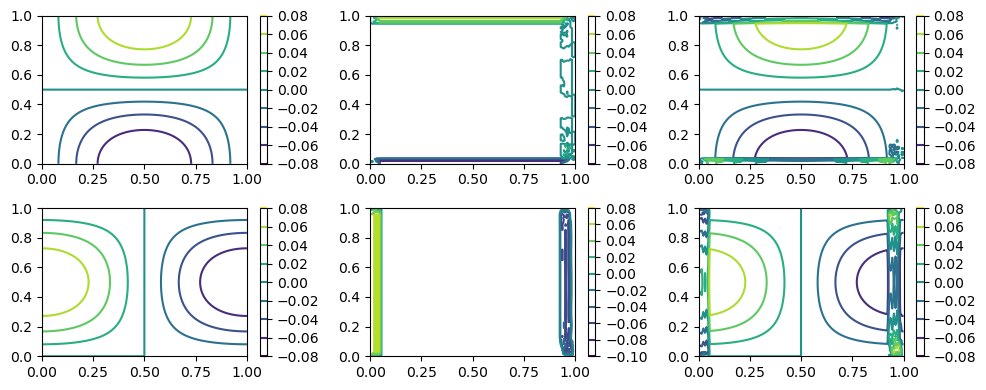

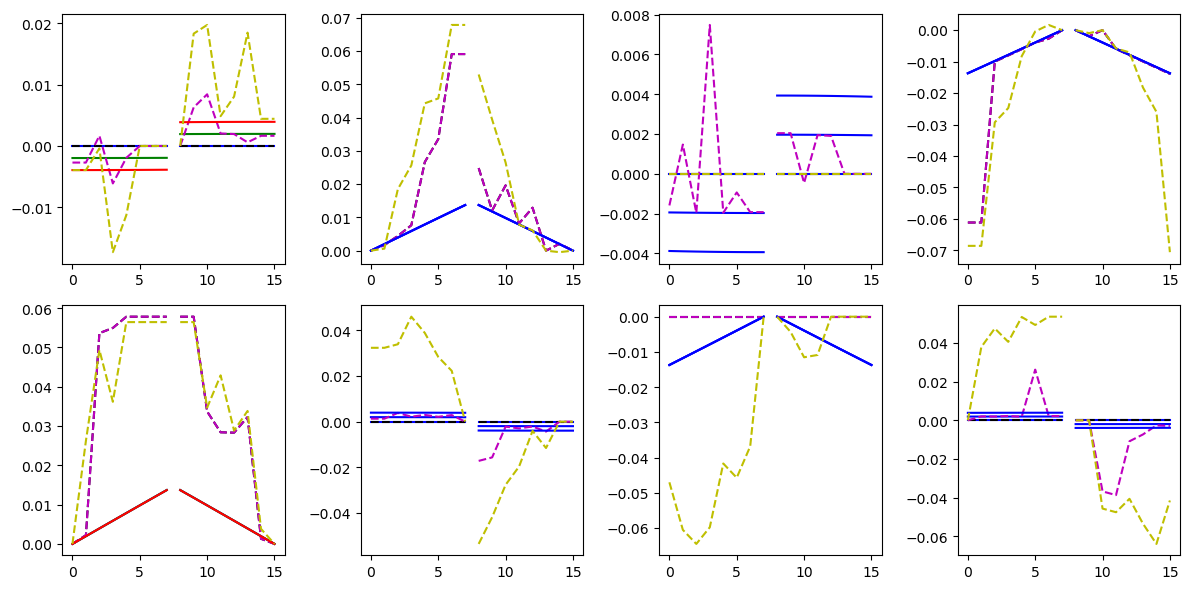


############################################
############################################
############################################
############################################

5 16 replicate 3 normal gelu 84769
0 0.09292193502187729 6.896972877257213e-07 0.005755958613008261 0.01 0.258404016494751
1000 0.09286185839286931 0.0 0.005755958613008261 0.01 0.07230305671691895
2000 0.0928748023288063 0.0 0.005755958613008261 0.005 0.05646800994873047
3000 0.09287911984959034 0.0 0.005755958613008261 0.005 0.05511879920959473
4000 0.09288127914953756 0.0 0.005755958613008261 0.0025 0.05788779258728027
5000 0.09288257490221535 0.0 0.005755958613008261 0.0025 0.05562591552734375
6000 0.09288343880930815 0.0 0.005755958613008261 0.00125 0.05572390556335449
7000 0.09288405592105947 0.0 0.005755958613008261 0.00125 0.05570387840270996
8000 0.09288451877415531 0.0 0.005755958613008261 0.000625 0.05541682243347168
9000 0.09288487878243482 0.0 0.005755958613008261 0.000625 0.055563926696777344


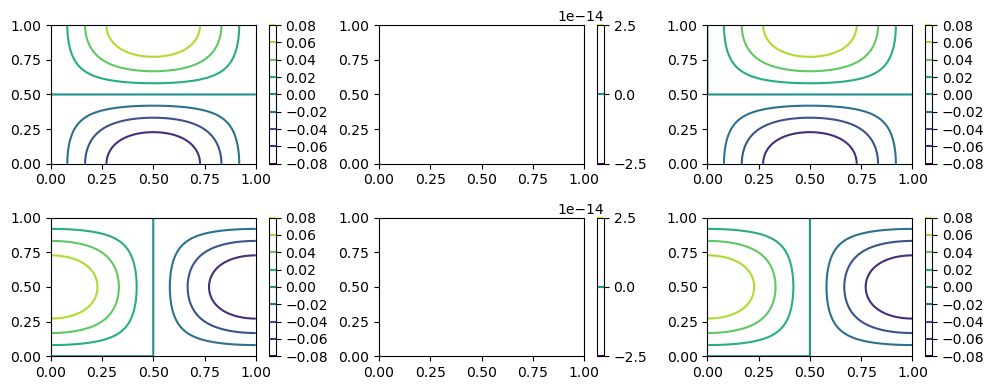

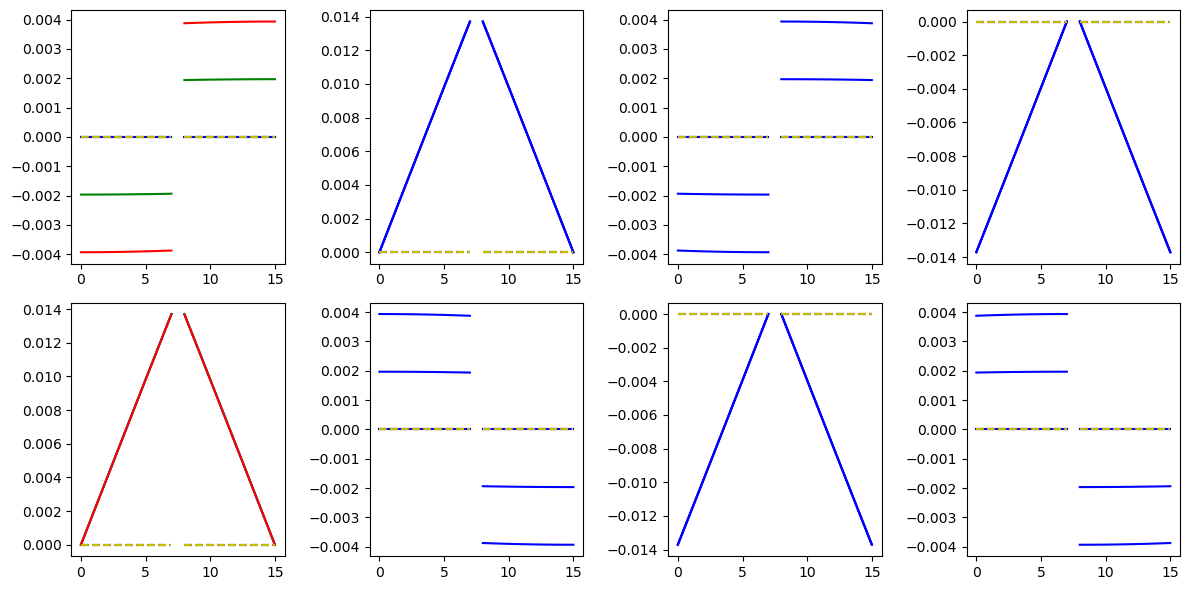

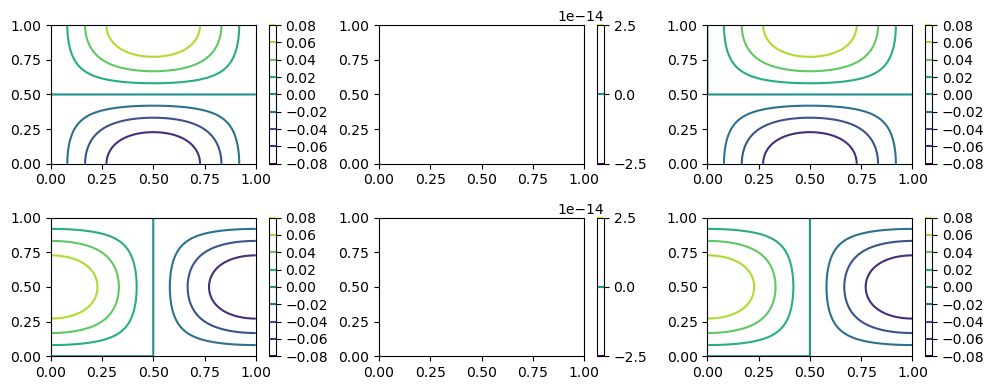

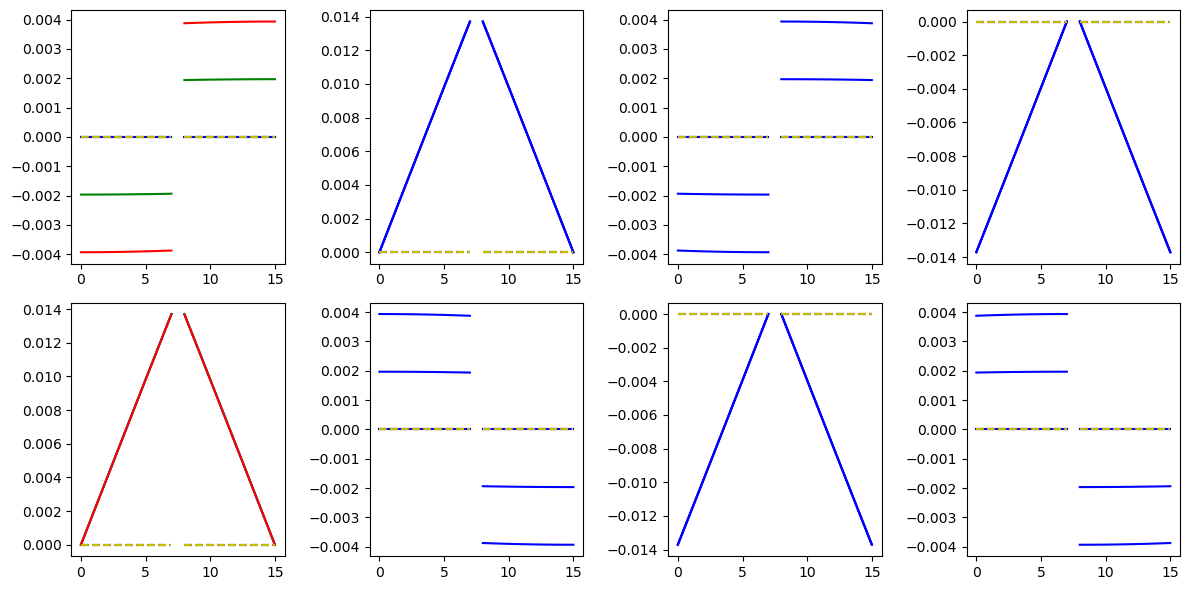

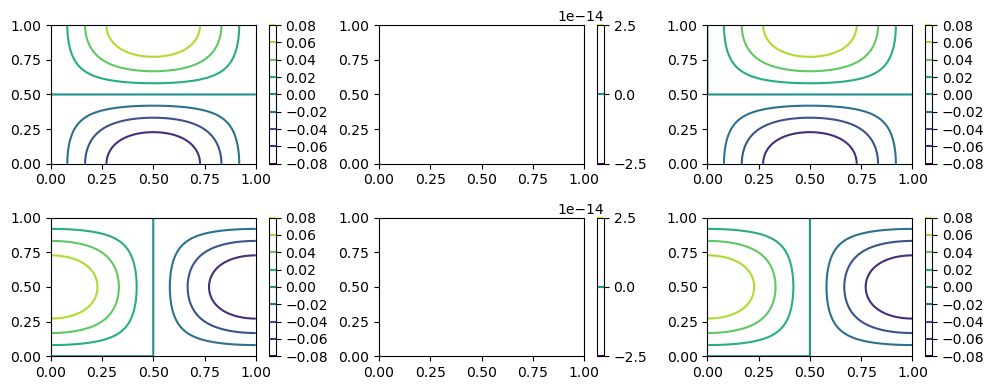

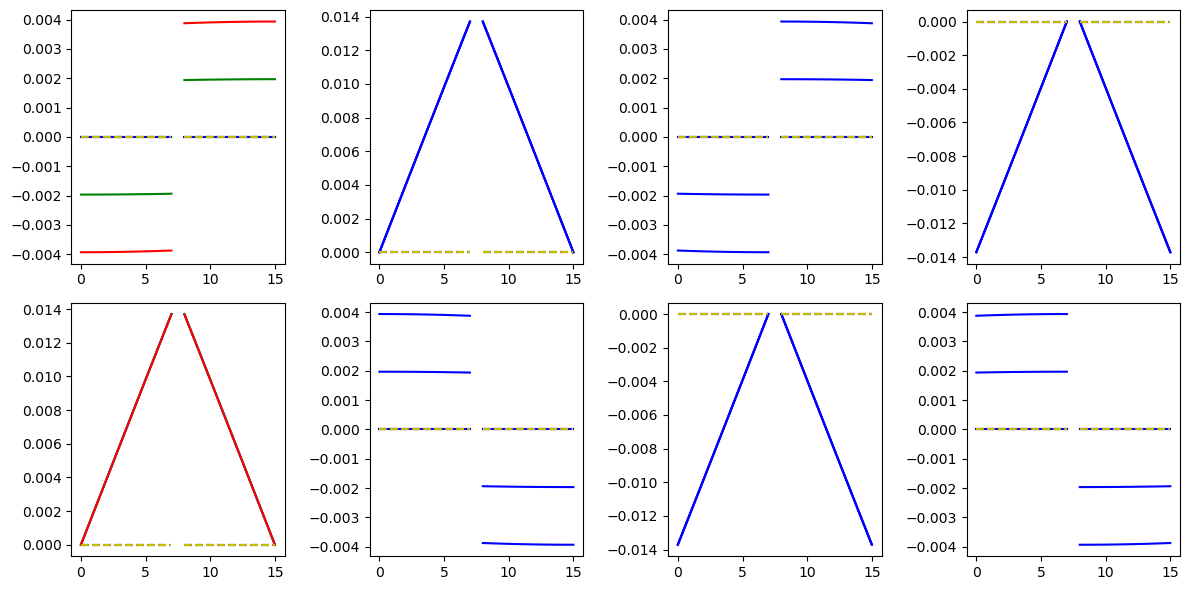

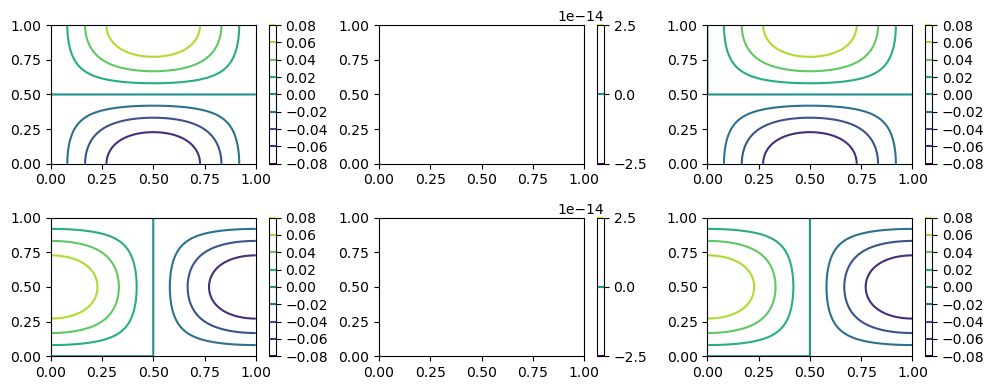

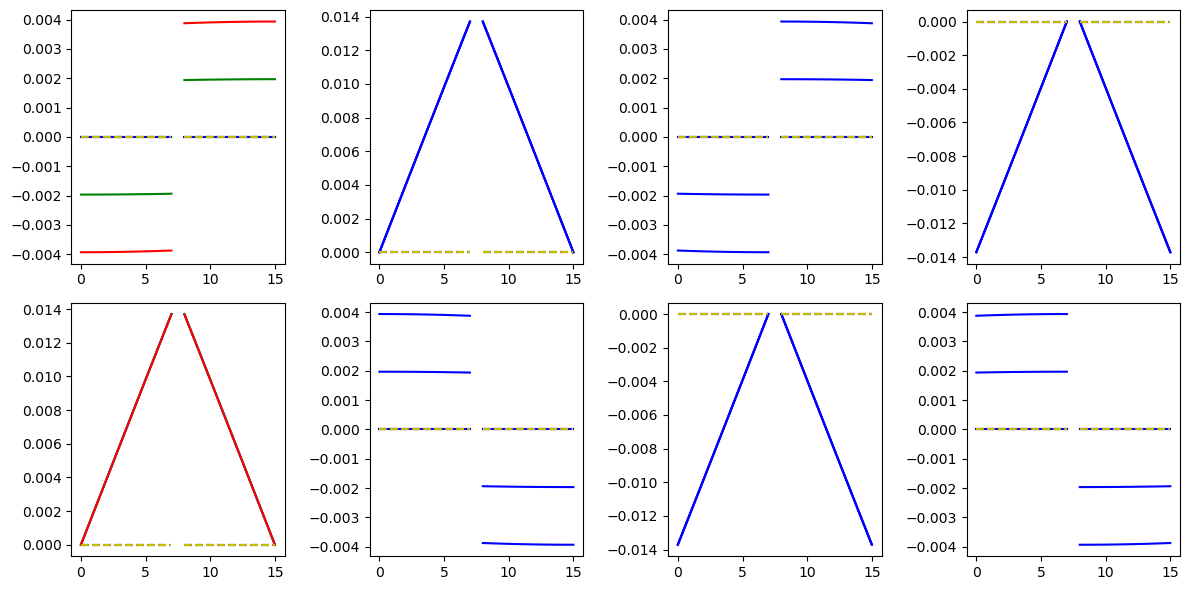

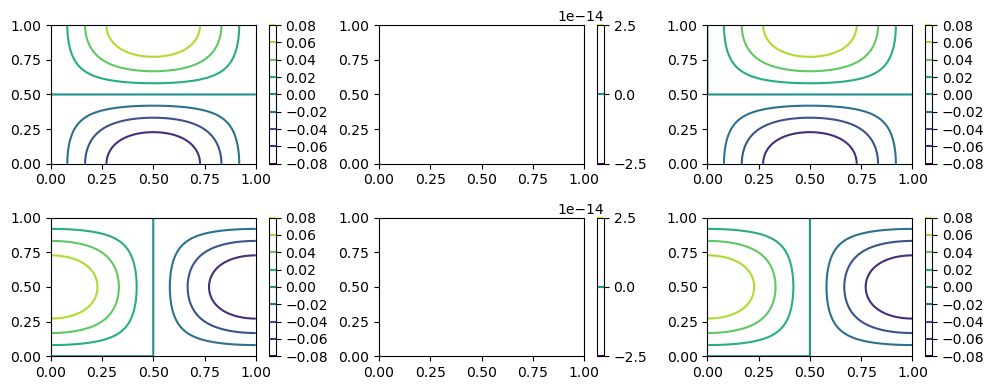

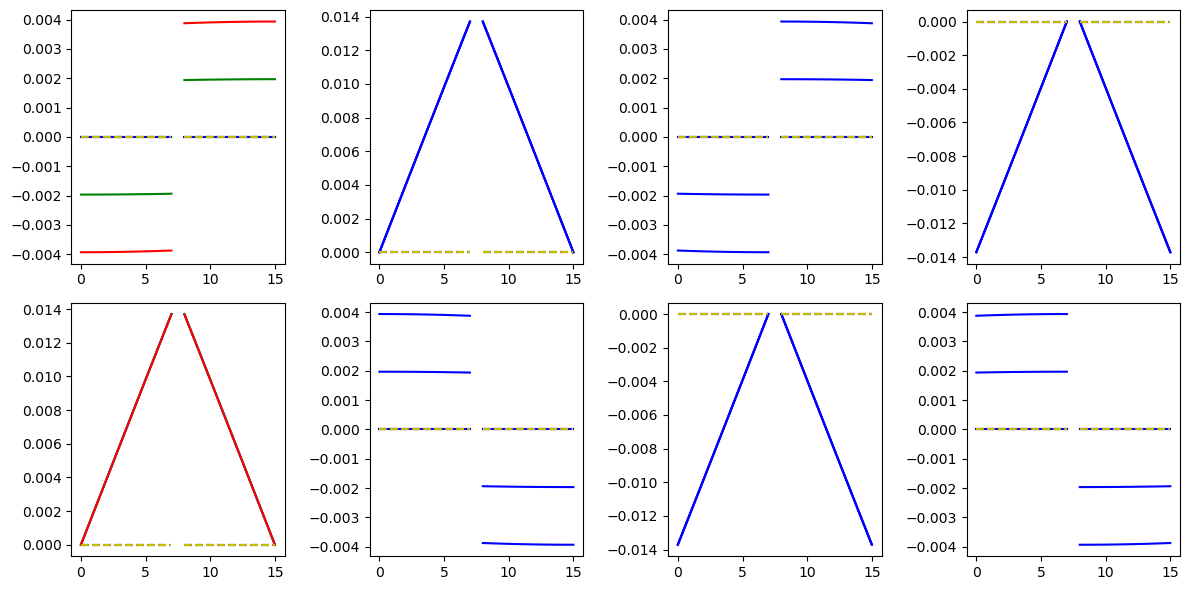

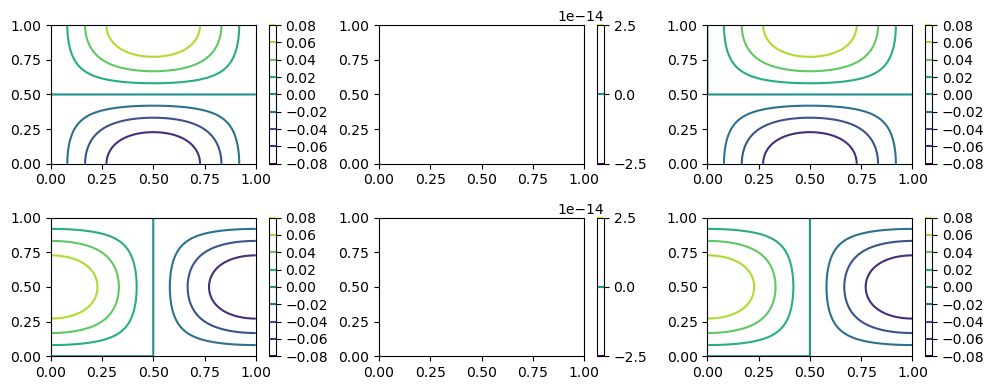

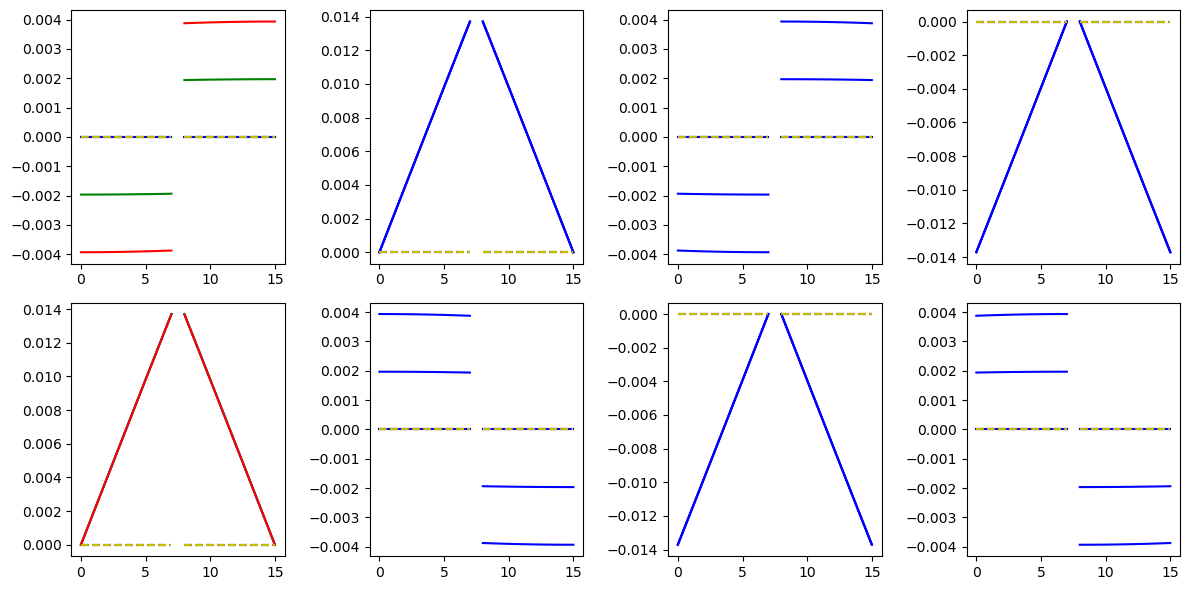

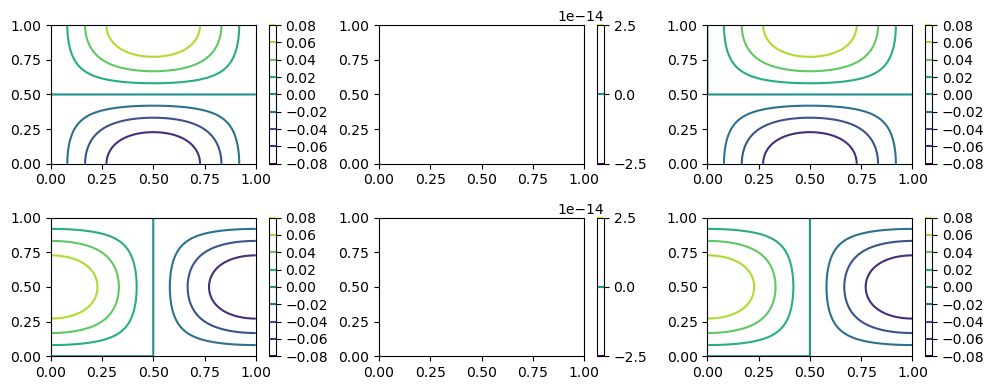

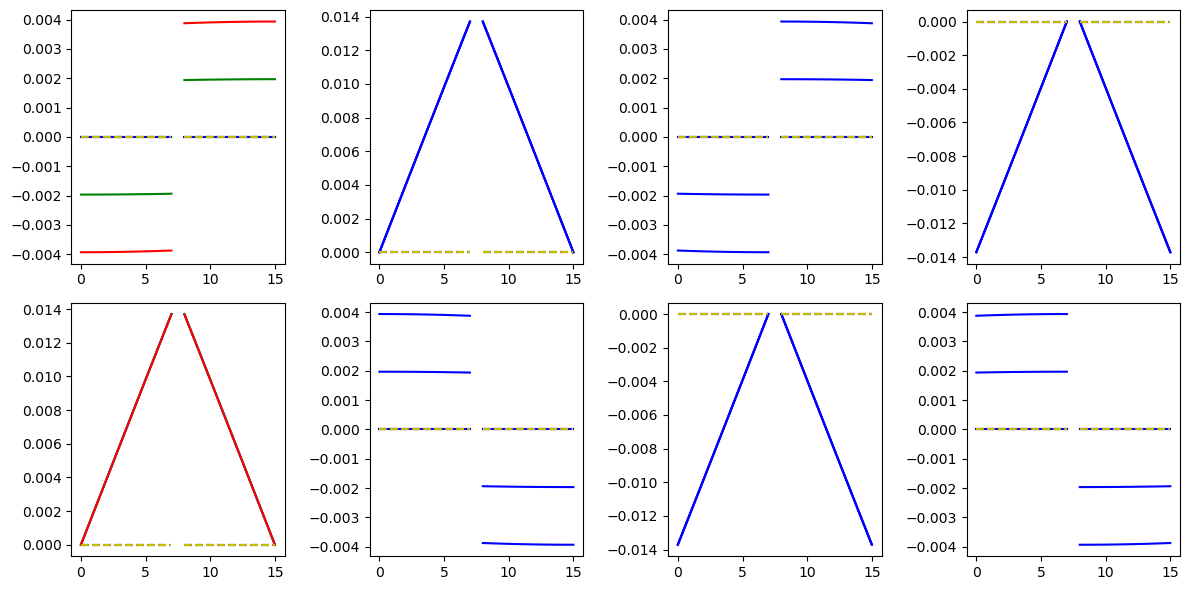

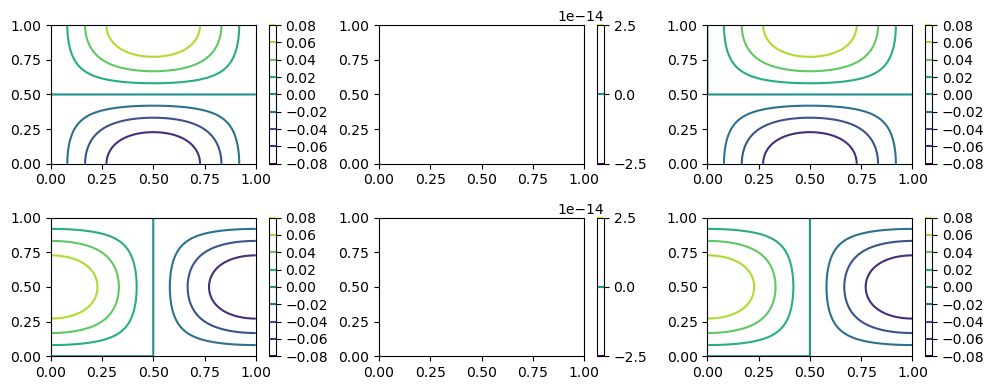

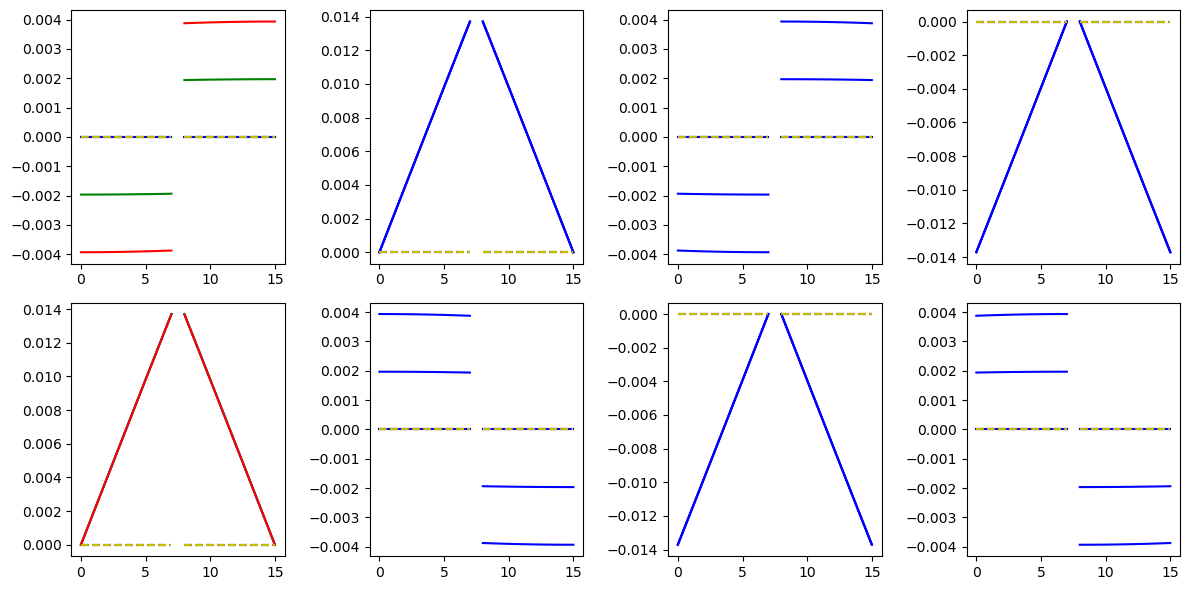


############################################
############################################
############################################
############################################

5 16 replicate 3 learned gelu 758689
0 0.0938781201839447 1.5091127352206968e-06 0.005755958613008261 0.01 0.5778801441192627
1000 0.011516376758332957 6.705539362883428e-06 0.005755958613008261 0.01 0.29651808738708496
2000 0.007571556314854868 4.245674517733278e-06 0.005755958613008261 0.005 0.2933359146118164
3000 0.0055806371291043586 2.3689374302193755e-06 0.005755958613008261 0.005 0.29549574851989746
4000 0.004541119385743572 1.9358367353561334e-06 0.005755958613008261 0.0025 0.29825711250305176
5000 0.0037797473083505634 1.3561859759647632e-06 0.005755958613008261 0.0025 0.2970008850097656


In [ ]:
device = torch.device("mps")
epochs = 10000
loss_fn = torch.nn.L1Loss()

c_i = 4
c_o = 1
layers = 5

errors = {}
for repeats in [6]:
    for c_h in [16]:
        for pad in ["replicate"]:
            for k in [5, 3]:
                for conv in ["normal", "learned"]:
                    for act in ["gelu"]:
                        
                        if conv=="normal":
                            fil = c_h #int(c_h*3)
                        else:
                            fil = c_h
            
                        net = FluidNet(device, pad, fil, 
                                       layers, k, conv, act,
                                       c_i, c_o, 
                                       x_n=xn, y_n=yn,
                                       repeats=repeats).to(device)
                    
                        print(layers, c_h, pad, k, conv, act, count_parameters(net))

                        optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
                        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 
                                                                    step_size=int(epochs/5), 
                                                                    gamma=0.5)

                        def get_lr(optimizer):
                            for param_group in optimizer.param_groups:
                                return param_group['lr']

                        running_loss = 0
                        xin = torch.tensor(x).view(-1,1,xn,yn).float().to(device)
                        yin = torch.tensor(y).view(-1,1,xn,yn).float().to(device)
                        uin = torch.tensor(u).view(-1,1,xn,yn).float().to(device)
                        vin = torch.tensor(v).view(-1,1,xn,yn).float().to(device)
                        etain = torch.tensor(eta).view(-1,1,xn,yn).float().to(device)
                        #pin = torch.tensor(p).view(1,1,xn,yn).float().to(device)
                        Tin = torch.tensor(T).view(-1,1,xn,yn).float().to(device)

                        inputs = torch.cat((xin, yin, etain/1000, Tin/181), axis=1)

                        for i in range(epochs):
                            t0 = time.time()
                            optimizer.zero_grad()

                            # Make predictions for this batch
                            u_pred, v_pred, p_pred, mass_pred, mass_true = net(inputs)

                            loss_mass = torch.mean(torch.abs(mass_pred))
                            loss_mass_true = torch.mean(torch.abs(mass_true))

                            weights = torch.zeros_like(u_pred) + 10.
                            weights[:,:,2:-2,2:-2] = 1

                            loss = loss_fn(u_pred*weights, uin*weights
                               ) + loss_fn(v_pred*weights, vin*weights
                               ) #+ loss_fn(p_pred*weights, pin*weights)
                                    
                            loss.backward()

                            # Adjust learning weights
                            optimizer.step()

                            # Gather data and report
                            running_loss += loss.item()
                            t1 = time.time()

                            if i%int(epochs/10)==0:
                                print(i, 
                                      running_loss/(i+1), 
                                      loss_mass.item(),
                                      loss_mass_true.item(),
                                      get_lr(optimizer), 
                                      t1-t0
                                     )

                            scheduler.step() #running_loss/(i+1)

                        for i in range(8):
                            make_plot(uin[i,0,...].detach().cpu().numpy(), 
                                      u_pred[i:i+1,...].detach().cpu().numpy(), 
                                      vin[i,0,...].detach().cpu().numpy(), 
                                      v_pred[i:i+1,...].detach().cpu().numpy(),
                                      x[i,0,...], 
                                      y[i,0,...],
                                      )

                        errors[str(layers) + "_" 
                             + str(c_h) + "_" + pad 
                             + "_" + str(k) + conv 
                             + "_" + act] = running_loss/(i+1)


                        print()
                        print("############################################")
                        print("############################################")
                        print("############################################")
                        print("############################################")
                        print()